## Data Preprocessing:
- Load the Iris dataset.
- Perform data exploration and visualization.
- Check for missing values and handle them if any.
- Split the dataset into features and target variables.

In [1]:
# Load the neccesary libraries:-
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
df = pd.read_csv('iris.csv')
df.head()

,Column1,Column2,Column3,Column4,Column5
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
# Check the missing values in each column
df.isnull().sum()

Column1    0
Column2    0
Column3    0
Column4    0
Column5    0
dtype: int64

In [4]:
# Display the total missing values in the dataset:
df.isnull().sum().sum()

0

In [5]:
# Change the column name into meaningful names:
df.rename(columns={'Column1':'SepalLengthCm', 'Column2':'SepalWidthCm', 'Column3':'PetalLengthCm','Column4':'PetalWidthCm','Column5':'Species'}, inplace=True)

In [6]:
df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [8]:
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [9]:
X = df.iloc[:, :-1].values
y = df.iloc[:, 4].values

In [10]:
# Split the dataset into train set and test set:

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

In [11]:
print('The shape of the train data:', 'X_train:',X_train.shape,'y_train:', y_train.shape)
print('The shape of the test data:', 'X_test:', X_test.shape,'y_test:', y_test.shape) 

The shape of the train data: X_train: (120, 4) y_train: (120,)
The shape of the test data: X_test: (30, 4) y_test: (30,)


## Unsupervised Learning: Clustering and Outlier Detection:
- Apply K-means clustering algorithm to cluster the data.
- Visualize the clusters.
- Detect outliers using appropriate techniques such as isolation forest or DBSCAN.
- Evaluate the clustering results.

In [12]:
# Import kmeans library
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
k_means = KMeans(n_clusters=3)
k_means.fit(X)

C:\Users\musta\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\musta\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=3)

Text(0.5, 1.0, 'Scatter Plot')

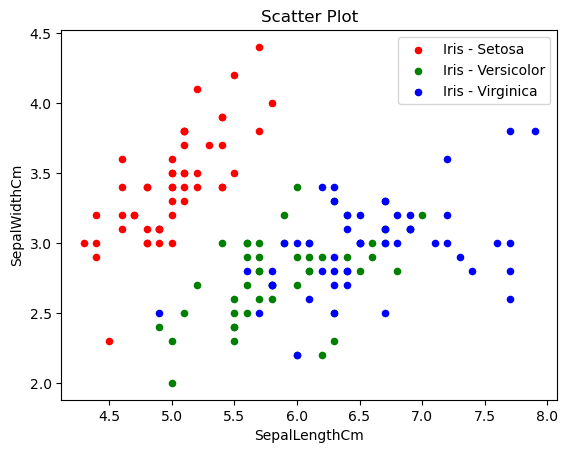

In [13]:
ax = df[df.Species=='Iris-setosa'].plot.scatter(x='SepalLengthCm', y='SepalWidthCm', 
                                                    color='red', label='Iris - Setosa')
df[df.Species=='Iris-versicolor'].plot.scatter(x='SepalLengthCm', y='SepalWidthCm', 
                                                color='green', label='Iris - Versicolor', ax=ax)
df[df.Species=='Iris-virginica'].plot.scatter(x='SepalLengthCm', y='SepalWidthCm', 
                                                color='blue', label='Iris - Virginica', ax=ax)
ax.set_title("Scatter Plot")

Text(0.5, 1.0, 'Scatter Plot')

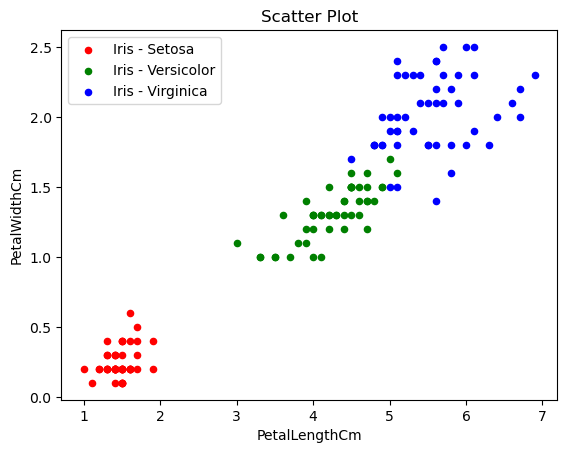

In [14]:
ax = df[df.Species=='Iris-setosa'].plot.scatter(x='PetalLengthCm', y='PetalWidthCm', 
                                                    color='red', label='Iris - Setosa')
df[df.Species=='Iris-versicolor'].plot.scatter(x='PetalLengthCm', y='PetalWidthCm', 
                                                color='green', label='Iris - Versicolor', ax=ax)
df[df.Species=='Iris-virginica'].plot.scatter(x='PetalLengthCm', y='PetalWidthCm', 
                                                color='blue', label='Iris - Virginica', ax=ax)
ax.set_title("Scatter Plot")

In [15]:
# Handle missing vaules using DBSCAN
from sklearn.cluster import DBSCAN

DBSModel = DBSCAN(metric='euclidean',eps=0.6, min_samples=5, algorithm='auto')
y_pred_train = DBSModel.fit_predict(X_train)
y_pred_test = DBSModel.fit_predict(X_test)

print('DBScanModel labels are:', DBSModel.labels_)
print('DBScanModel Train data are:', y_pred_train)
print('DBScanModel Test data are:', y_pred_test)

DBScanModel labels are: [-1  1 -1 -1 -1  0 -1  1  1 -1  1 -1 -1 -1  0  0 -1 -1 -1  0  0  0 -1  1
 -1  1  1 -1  0 -1]
DBScanModel Train data are: [ 0  1  1  0  1  1  1  0  1  0 -1  1  1  1  0  1  0  0  1  0 -1  1  1  0
  1 -1  0  0  1  1  0  1  1  0  1  0  1 -1  1  1  1  1  1  0  1  0  1  1
  1  0 -1  1  1  1  0  1  1  0  1  1  1 -1  1  1  0  1  0  0 -1  0  0 -1
  0 -1  1  1  1  1  1  0  1  0  0  1  0 -1  0  1  1  1  0  1  0  0  1 -1
 -1  1  0  1  1  1  0  0  1  1  0  0  0  1 -1  1  1  1  1  1  1  0  0  1]
DBScanModel Test data are: [-1  1 -1 -1 -1  0 -1  1  1 -1  1 -1 -1 -1  0  0 -1 -1 -1  0  0  0 -1  1
 -1  1  1 -1  0 -1]


In [16]:
nclusters = len(set(DBSModel.labels_)) - (1 if -1 in DBSModel.labels_ else 0)
n_noise = list(DBSModel.labels_).count(-1)

print('Estimated number of clusters: %d' % nclusters)
print('Estimated number of noises: %d' % n_noise)

Estimated number of clusters: 2
Estimated number of noises: 16


## Supervised Learning: Baseline Model:
- Choose an appropriate evaluation metric based on the problem (classification)
- Split the dataset into training and testing set.
- Build a baseline model (e.g., logistic regression or decision tree) using default parameter.
- Evaluate the baseline model's performarmance.

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

evaluation_metric = 'accuracy'

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.8, random_state=42)

baseline_model = LogisticRegression()
baseline_model.fit(X_train, y_train)

y_pred = baseline_model.predict(X_test)

evaluation_result = accuracy_score(y_test, y_pred)

print(f"Baseline Model Performance ({evaluation_metric}): {evaluation_result}")
print("Classification Report:")
print(classification_report(y_test, y_pred))

Baseline Model Performance (accuracy): 0.9666666666666667
Classification Report:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        43
Iris-versicolor       0.97      0.92      0.95        39
 Iris-virginica       0.93      0.97      0.95        38

       accuracy                           0.97       120
      macro avg       0.97      0.97      0.97       120
   weighted avg       0.97      0.97      0.97       120



## Model Comparison:- Select 3-4 machine learning algorithms (e.g., SVM, Random Forest, Gradient Boosting) suitable for the problem.
- Implement each algorithm and evaluate its performance using cross-validation
- Compare the performance of algorithms based on evaluation metrics
- Select the best-performing algorithm.

In [18]:
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression

models = {
    "SVM": SVC(),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "Logistic Regression": LogisticRegression()
}

evaluation_metric = 'accuracy'
num_folds = 5

results = {}
for model_name, model in models.items():
    scores = cross_val_score(model, X_train, y_train, cv=num_folds, scoring=evaluation_metric)
    results[model_name] = scores

print("Mean {} Scores:".format(evaluation_metric))
for model_name, scores in results.items():
    print(f"{model_name}: {np.mean(scores):.4f} (±{np.std(scores):.4f})")

Mean accuracy Scores:
SVM: 0.9333 (±0.0816)
Random Forest: 1.0000 (±0.0000)
Gradient Boosting: 0.9667 (±0.0667)
Logistic Regression: 0.9667 (±0.0667)


In [19]:
# The best model based on the performance:
best_model = max(results, key=lambda x: np.mean(results[x]))
print("\nBest Performing Model:", best_model)


Best Performing Model: Random Forest


## Model Tuning and Ensemble:
-  Perform hyperparameter tuning on the best-performing algorithm using Grid Search or Random Search
- • Evaluate the tuned model's performan.
-  • Implement an ensemble of the top-performing algorithms and compare its performance with the tuned model.

In [20]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score

param_grid_svm = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto']
}

svm_clf = SVC()

grid_search_svm = GridSearchCV(svm_clf, param_grid_svm, cv=num_folds, scoring=evaluation_metric)

grid_search_svm.fit(X_train, y_train)

best_params_svm = grid_search_svm.best_params_
best_score_svm = grid_search_svm.best_score_

best_svm_model = grid_search_svm.best_estimator_

print("Best parameters for SVM:", best_params_svm)
print("Best mean accuracy score for SVM:", best_score_svm)

tuned_svm_predictions = best_svm_model.predict(X_test)
accuracy_tuned_svm = accuracy_score(y_test, tuned_svm_predictions)
print("Accuracy of the tuned SVM model:", accuracy_tuned_svm)


ensemble_models = [('Tuned SVM', best_svm_model)]

ensemble = VotingClassifier(estimators=ensemble_models, voting='hard')

ensemble.fit(X_train, y_train)

ensemble_predictions = ensemble.predict(X_test)
accuracy_ensemble = accuracy_score(y_test, ensemble_predictions)

print("Accuracy of the ensemble model:", accuracy_ensemble)

Best parameters for SVM: {'C': 10, 'gamma': 'scale', 'kernel': 'linear'}
Best mean accuracy score for SVM: 1.0
Accuracy of the tuned SVM model: 0.975
Accuracy of the ensemble model: 0.975
